In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [26]:
traj_dir='//Users/mingyu/analysis/COX-2_oneheme//'
traj = pt.iterload('*strip.nc', '*strip.parm7',stride=1)
pt.superpose(traj, ref=0)
rmsf_list=pt.rmsf(traj[int(len(traj)*0.75):] ,mask='byres')   
print (len(rmsf_list))
Dimer_1=rmsf_list[0:551]
print(len(Dimer_1))
print (Dimer_1)
Dimer_2= rmsf_list[553:]
print(len(Dimer_2))
print (Dimer_2)
rmsf_stack=np.vstack((Dimer_1.T[1],Dimer_2.T[1]))
print (rmsf_stack)

1104
551
[[  1.           4.12714194]
 [  2.           3.31156277]
 [  3.           1.67876441]
 ...
 [549.           1.06497001]
 [550.           1.05764731]
 [551.           1.47735087]]
551
[[5.54000000e+02 1.64623008e+00]
 [5.55000000e+02 1.27437096e+00]
 [5.56000000e+02 9.40335174e-01]
 ...
 [1.10200000e+03 1.09695017e+00]
 [1.10300000e+03 1.24106341e+00]
 [1.10400000e+03 1.46817240e+00]]
[[4.12714194 3.31156277 1.67876441 ... 1.06497001 1.05764731 1.47735087]
 [1.64623008 1.27437096 0.94033517 ... 1.09695017 1.24106341 1.4681724 ]]


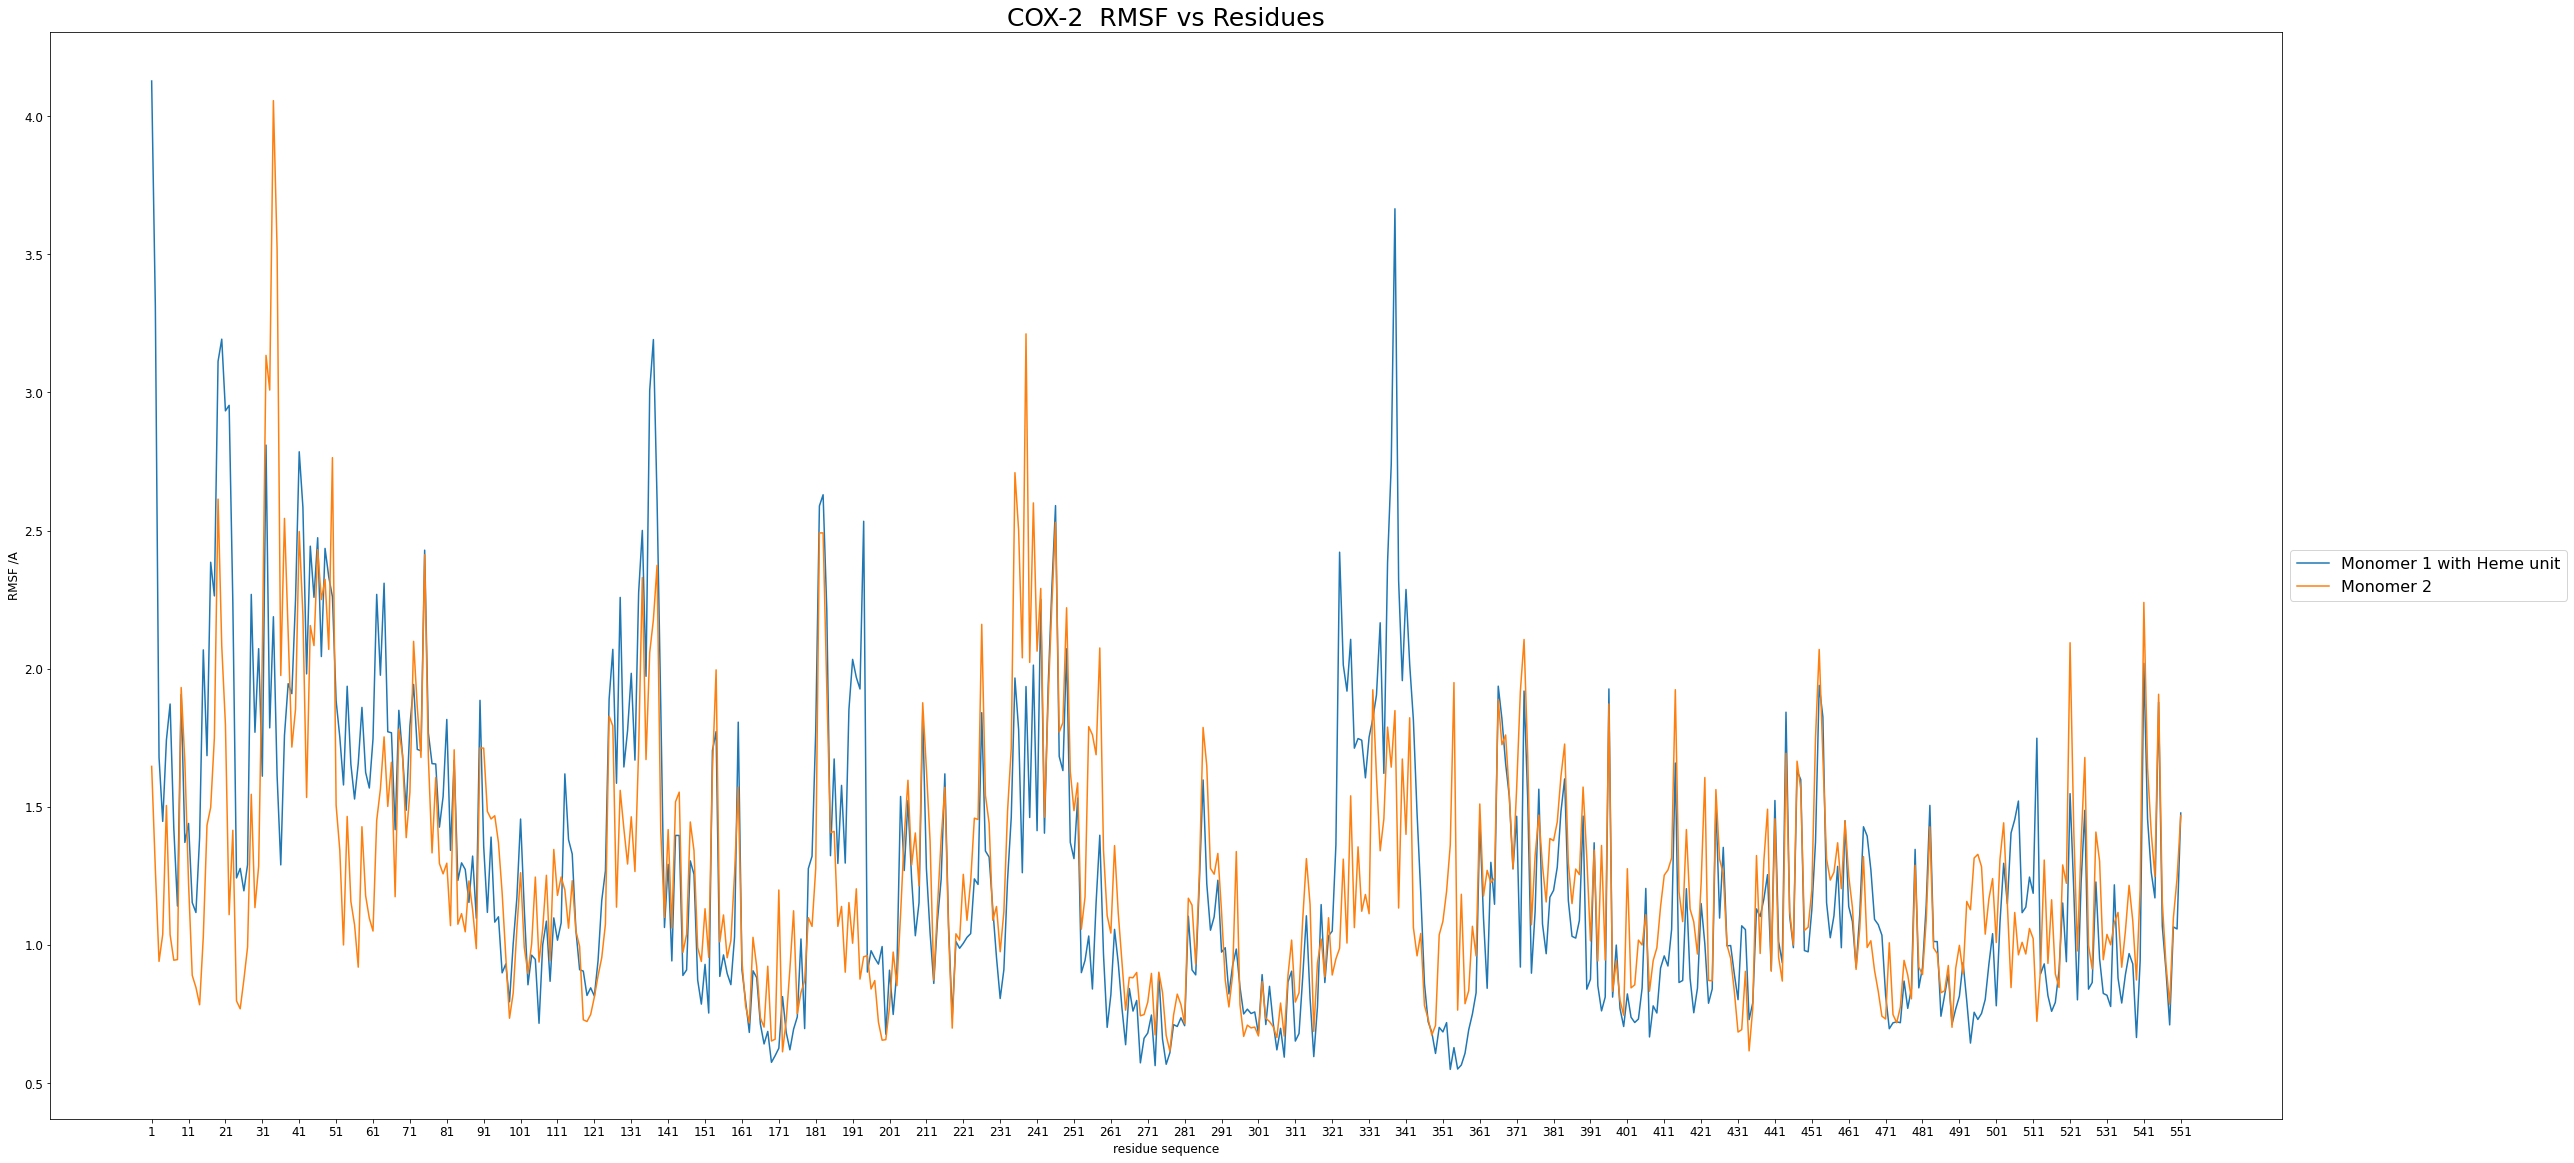

In [28]:
plt.figure(figsize = (40,20))
res_seq=np.array(range(1,552))
plt.plot(res_seq,Dimer_1.T[1],label= "Monomer 1 with Heme unit")
plt.plot(res_seq,Dimer_2.T[1],label= "Monomer 2")
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
plt.rcParams['font.size'] = '16'
plt.xticks(range(1,554,10))
plt.xlabel('residue sequence')
plt.ylabel('RMSF /A')
plt.title('COX-2  RMSF vs Residues', fontdict = {'fontsize' : 25})
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[4.12714194 3.31156277 1.67876441 ... 1.09695017 1.24106341 1.47735087]
Empty DataFrame
Columns: []
Index: [Monomer 1 with Heme, Monomer 2]


Text(0.5, 46.0, 'Number of residue')

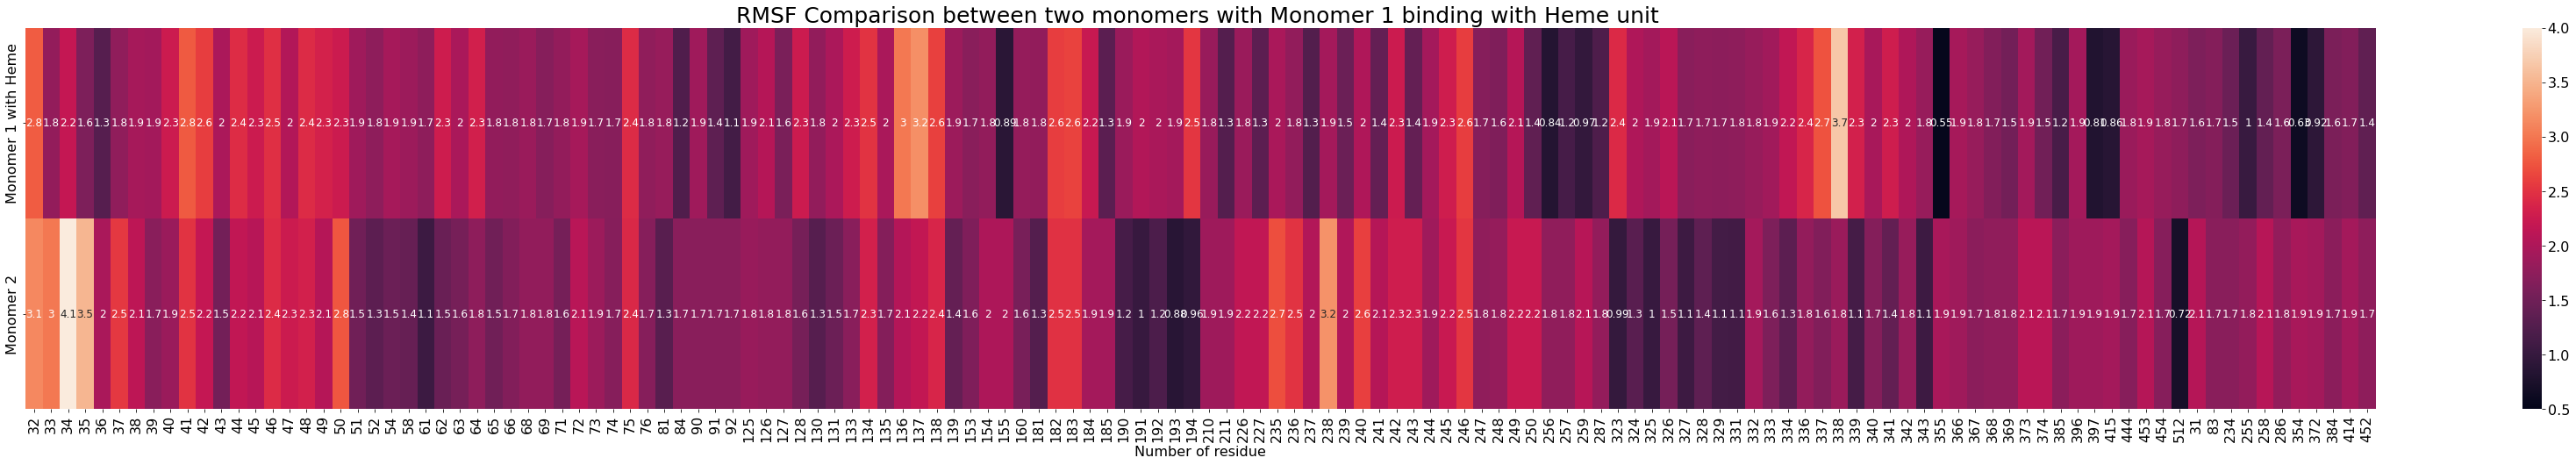

In [41]:
sub_name=['Monomer 1 with Heme','Monomer 2',]
df = pd.DataFrame(index=sub_name)
res_seq=np.array(range(1,552))
#find the max value per column, per repeating subunit
max_rmsf=np.max(rmsf_stack,axis=0)
var_rmsf=np.var(rmsf_stack,axis=0)
print(max_rmsf)

print (df)
for res in res_seq[(var_rmsf>=0)&(max_rmsf>1.8)]:
    if int(res) > 30 and int(res) < 520:                    
        df1[int(res)]=rmsf_stack[:,int(res)-1]

plt.figure(figsize = (60,8))
sns.heatmap(df1,annot=True,annot_kws={"size":12},vmax=4,vmin=0.5)
plt.title('RMSF Comparison between two monomers with Monomer 1 binding with Heme unit ', fontdict = {'fontsize' : 25})
plt.xlabel('Number of residue', fontdict = {'fontsize' : 16})

[0.         0.7679173  0.70453206 ... 2.06194268 1.89162534 1.93138735]
[3.25023134e-07 7.74302317e-01 8.86471750e-01 ... 1.85514211e+00
 1.80160177e+00 1.77815387e+00]
6000


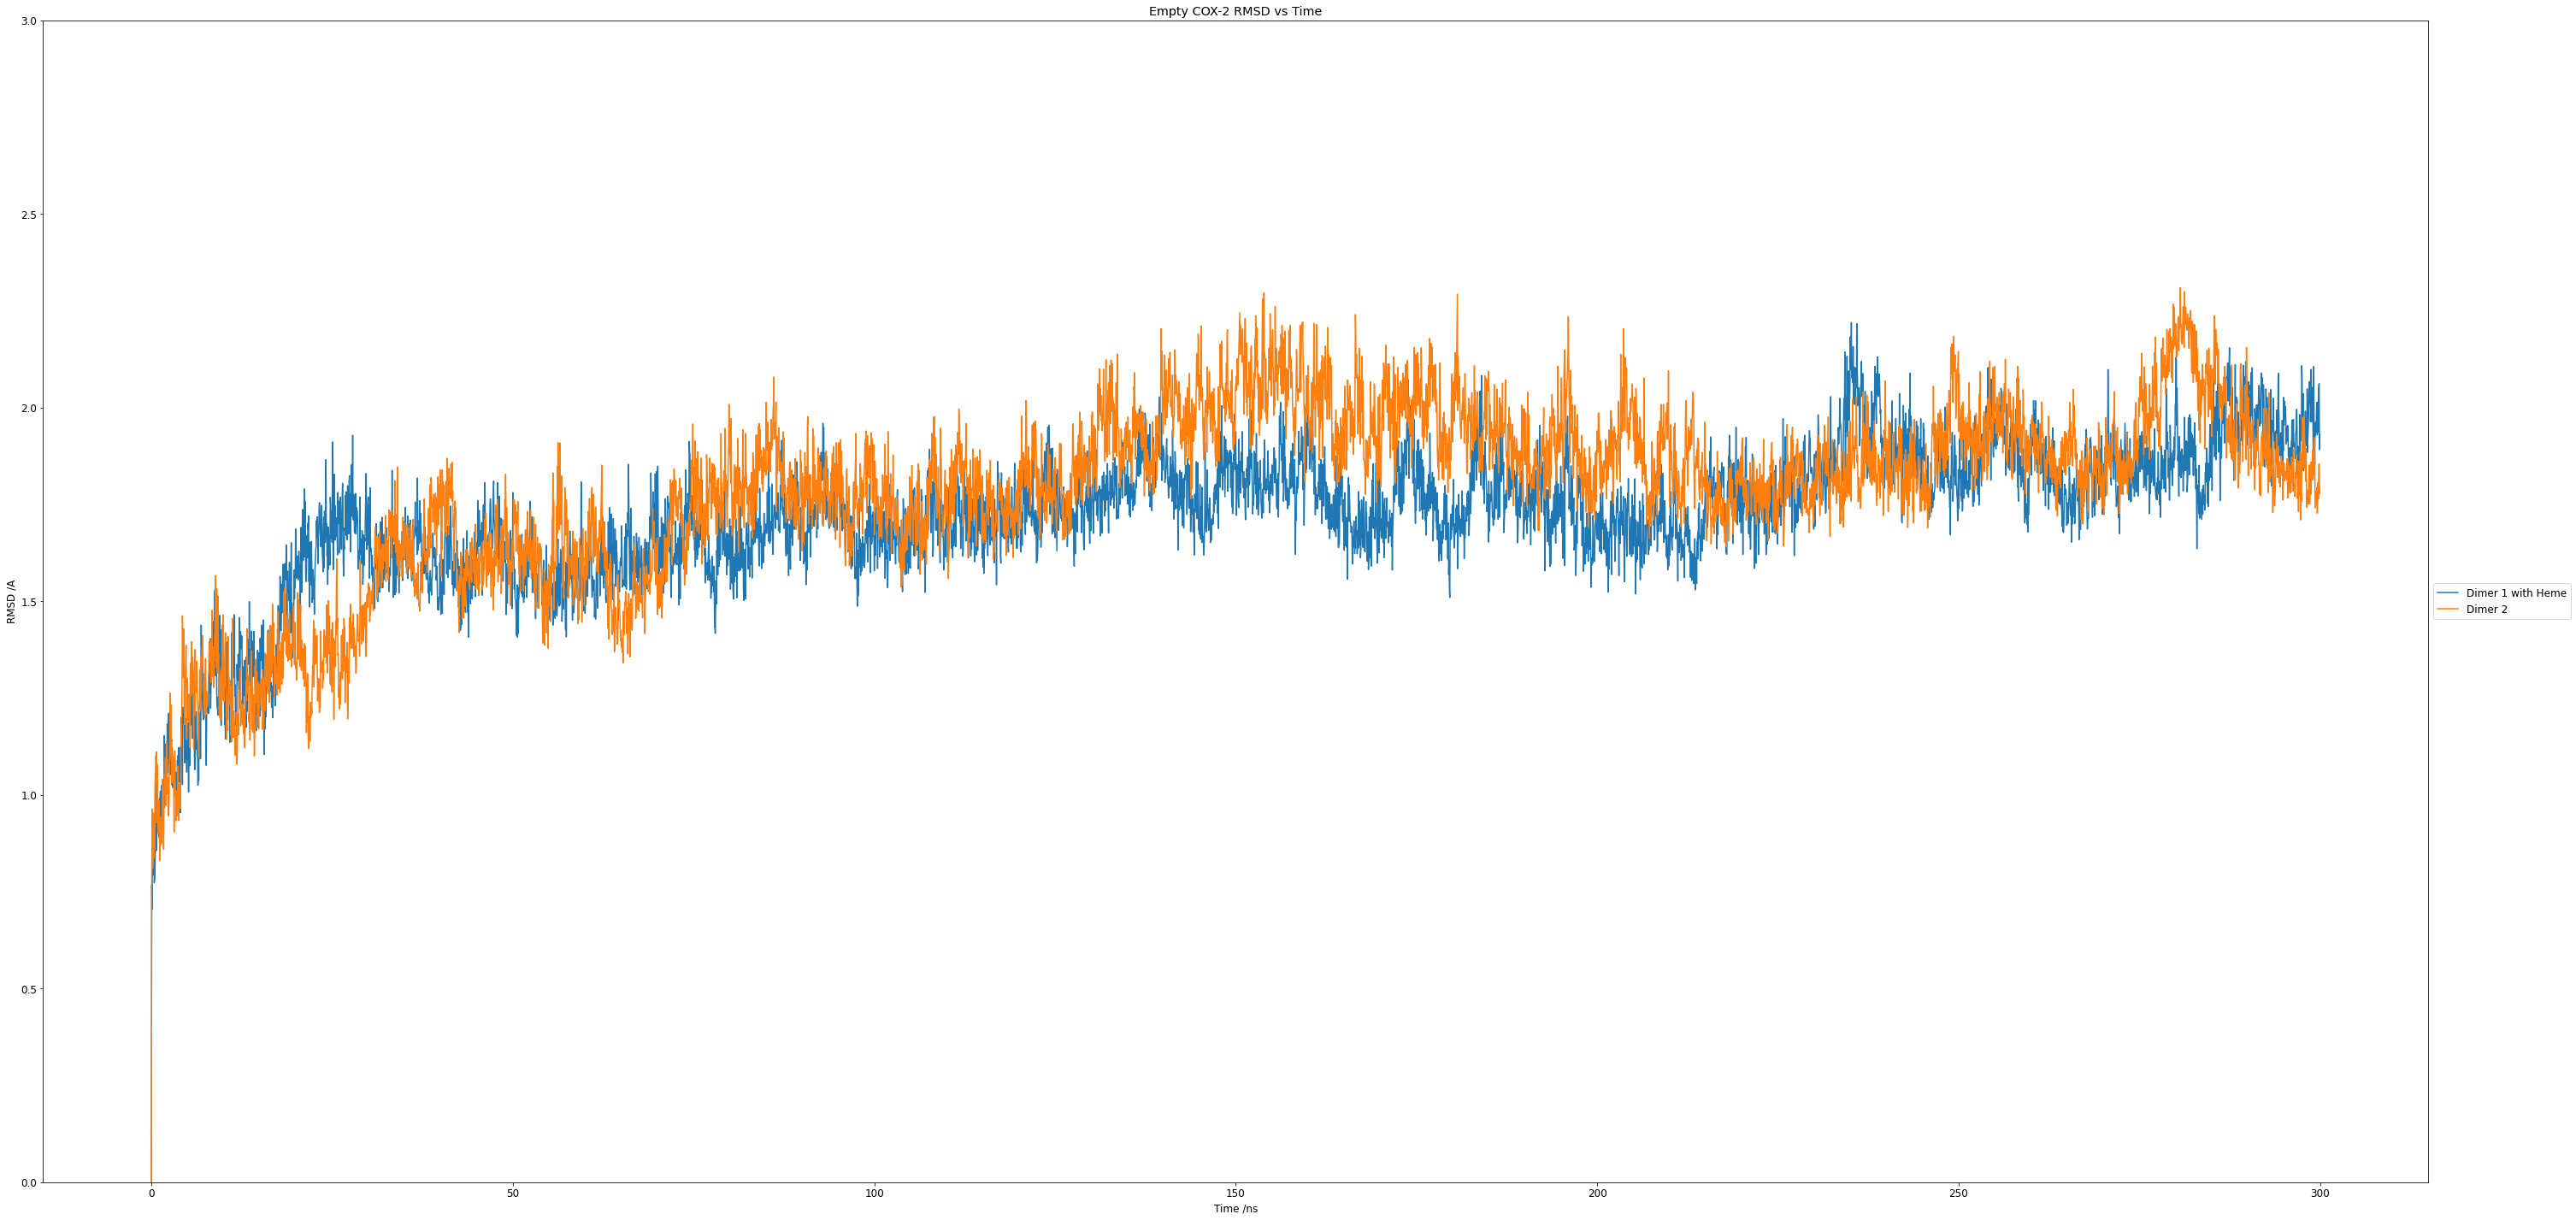

In [14]:
rmsd_traj = traj
pt.superpose(rmsd_traj, ref=0)
rmsd_dimer1 = pt.rmsd(rmsd_traj,ref=0, mask=':1-553@CA')
rmsd_dimer2 = pt.rmsd(rmsd_traj,ref=0, mask=':554-1104@CA')
print (rmsd_dimer1)
print (rmsd_dimer2)
md_time= list(np.arange(0,300,0.05))
print (len(md_time))
plt.figure(figsize = (50,25))
plt.rcParams['font.size'] = '12'
plt.plot(md_time, rmsd_dimer1,label= "Dimer 1 with Heme")
plt.plot(md_time, rmsd_dimer2,label= "Dimer 2  ")

plt.xlabel('Time /ns')
plt.ylabel('RMSD /A')
plt.ylim(0, 3)
plt.title('Empty COX-2 RMSD vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))